# Basic MLMC runs and plots

In [1]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))


In [2]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i] = mlmc(x, y, 
                                                     test_bound, test_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_phi(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/10 [00:00<?, ?it/s]

average error:  0.08563188819781421
maximal error:  0.20417026485843293
minimal error:  0.002444507882636726
std of error:  0.05428871074123076


  0%|          | 0/10 [00:00<?, ?it/s]

average error:  0.07451185664091603
maximal error:  0.13384115121806683
minimal error:  0.0032285597295905744
std of error:  0.0476395705398794


  0%|          | 0/10 [00:00<?, ?it/s]

average error:  0.07827349054509918
maximal error:  0.1197236793693961
minimal error:  0.03928583740253799
std of error:  0.03102047275360307


  0%|          | 0/10 [00:00<?, ?it/s]

average error:  0.044185400923084095
maximal error:  0.08577782152165381
minimal error:  0.00690974334593264
std of error:  0.02814633094788932


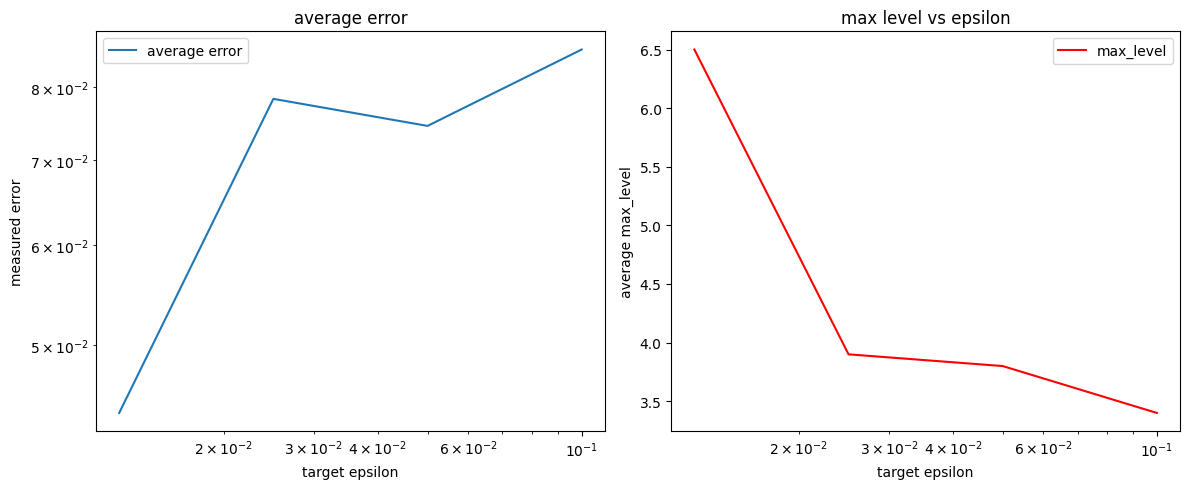

In [5]:
import matplotlib.pyplot as plt
N = 10
x = y = .5
dt0 = .01
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()